In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Question** Importer le fichier `heart_Disease.csv` dans un `dataframe`. Regarder les premières lignes, regardez les statistiques descriptives.

In [52]:
df=pd.read_csv('heart_Disease.csv',header=0,sep=',')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Observation

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Question** Regardez l'aide sur `nunique` de pandas et afficher des informations complémentaires sur ce dataset. Les valeurs numériques sont elles toutes des valeurs continues ou des valeurs discrètes ? 

In [55]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Les attributs ici qui ont un nombre de valeurs supérieur à 5 sont plutôt à interpréter comme des attributs à valeurs continues et les autres des attributs catégoriels à valeurs discrètes. 

In [56]:
attrs_cont = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
attrs_cat = list(set(df.columns).difference(set(attrs_cont)))
attrs_cat.remove('target')
attrs_cat

['sex', 'fbs', 'thal', 'cp', 'ca', 'restecg', 'exang', 'slope']

**Question** Une `DataFrame` est une collection de `Series` qui sont les colonnes. On peut aussi regarder les différentes valeurs que peuvent prendre les colonnes avec `value_counts`. Regardez les différentes valeurs de chaque colonne et en particulier de la `target`.

In [57]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Question** Tracer des histogrammes représentant ces comptages. Vous pouvez directement utiliser la méthode `hist`des `DataFrames` ou des `Series`.

array([[<AxesSubplot:title={'center':'cp'}>]], dtype=object)

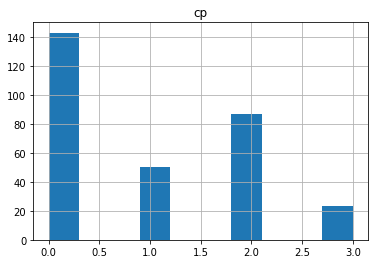

In [58]:
df.hist('cp')

<AxesSubplot:>

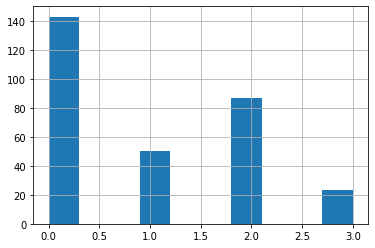

In [59]:
df['cp'].hist()

# Petit rappel de Pandas

In [60]:
df['age'].head()  # sélection d'une colonne

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [61]:
df[['age', 'sex']].head() # sélection de colonnes

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [62]:
df.iloc[:,0:2].head() # sélection lignes et de colonnes par les indices

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [63]:
df['sex']==0  # filtre, série de booléens

0      False
1      False
2       True
3      False
4       True
       ...  
298     True
299    False
300    False
301    False
302     True
Name: sex, Length: 303, dtype: bool

In [64]:
df[df['sex']==0] # application d'un filtre

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [65]:
df[df['sex']==0][['age','slope']]  # cumuler un filtre et une sélection

,age,slope
2,41,2
4,57,2
6,56,1
11,48,2
14,58,2
...,...,...
289,55,1
292,58,1
296,63,1
298,57,1


# Préparation

**Question** Préparer l'échantillon pour permettre une évaluation de l'erreur.

In [66]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.33,random_state = 42)

In [67]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

# Classe majoritaire

**Question** Dans un problème de classification, il faut toujours évaluer les performances d'un classifieur par rapport à quelque chose de très bête qui est la fonction constante qui prédit la classe la plus fréquente. D'après les statistiques quel serait la performance d'une telle règle sur l'échantillon complet?

*Réponse* : 

**Question** On peut trouver d'autres classeurs très bêtes comme celui-ci dans le package `dummy` de sklearn. Faites un tel classifieur qui prédit la classe majoritaire avec une des instances d'un des modules de ce package.

In [68]:
from sklearn.dummy import DummyClassifier

In [69]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

In [70]:
pred_most_frequent = dummy_majority.predict(X_test)

# Naive Bayes

**Question** Lire l'explication introductive de Naive Bayes dans la [documentation de sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). On refait ci-dessous quelques calculs presque à la main, de façon pas très maligne, juste pour décomposer et comprendre...

**Question** Prenons les attributs `sex` et `fbs`. Calculons le nombre de fois où `sex` vaut 1 et 0 quand la cible `target` vaut 1.

In [71]:
df_t1 = df[df['target'] == 1]

In [72]:
[s1t1,s0t1] = df_t1['sex'].value_counts()

**Question** Calculer les probabilités  P(sex=1|target=1), P(sex=0|target=1) nommés p1s1 et p1s0

In [73]:
p1s1 = s1t1 / df_t1.shape[0]
p1s0 = s0t1 / df_t1.shape[0]
p1s1,p1s0

(0.5636363636363636, 0.43636363636363634)

**Question** Prenons les attributs `sex` et `fbs`. Calculons les probabilités suivantes sur l'échantillon de train.
- P(sex|target), c'est-à-dire les 4 valeurs P(sex=1|target=1), P(sex=0|target=1), P(sex=1|target=0), P(sex=0|target=0). Nommés p1s1, p1s0, p0s1, p0s0 
- P(fbs|target) (4 valeurs). Nommés p1f1, p1f0, p0f1, p0f0 

In [74]:
df_train_t1 = df_train[df_train['target'] == 1]

In [75]:
df_train_t0 = df_train[df_train['target'] == 0]

In [76]:
[p1s1,p1s0]=df_train_t1['sex'].value_counts()/df_train_t1.shape[0]

In [77]:
[p0s1,p0s0]=df_train_t0['sex'].value_counts()/df_train_t0.shape[0]

In [78]:
[p1f0,p1f1]=df_train_t1['fbs'].value_counts()/df_train_t1.shape[0]

In [79]:
[p0f0,p0f1]=df_train_t0['fbs'].value_counts()/df_train_t0.shape[0]

In [80]:
p1s1, p1s0, p0s1, p0s0

(0.5233644859813084, 0.4766355140186916, 0.8125, 0.1875)

In [81]:
p1f1, p1f0, p0f1, p0f0

(0.14018691588785046,
 0.8598130841121495,
 0.11458333333333333,
 0.8854166666666666)

**Question** Toujours sur le train, quelles sont les probabilités d'avoir la cible à 1 ou à 0 ? p1, p0

In [82]:
p1,p0=df_train['target'].value_counts()/df_train.shape[0]
p1,p0

(0.5270935960591133, 0.4729064039408867)

**Question** Maintenant prenons le premier exemple du test et regardons les attributs `sex` et `fbs`. Avec le modèle de Naive Bayes, quelle serait la valeur de la cible qui serait prédite et pourquoi ? 

*Réponse* : C'est donc 0 la valeur prédite.

**Question** Importez `CategoricalNB` et appliquez le classifeur en ne prenant en compte que les attributs `sex` et `fbs` pour retrouver ces résultats.

In [83]:
from sklearn.naive_bayes import CategoricalNB

In [84]:
X2_train,X2_test,y2_train,y2_test=train_test_split(df[['sex','fbs']].values,df['target'].values,test_size=0.33,random_state=42)

In [85]:
cnb= CategoricalNB()

In [86]:
y_pred = cnb.fit(X2_train, y2_train).predict(X2_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

**Question** Appliquez le classifeur sur les attributs catégoriels et estimer le score.

In [87]:
cnb.score(X2_test,y2_test)

0.57

# Arbres de décision

**Question** Utilisez la classe `DecisionTreeClassifier` du package `tree` pour créer un arbre de décision. Quel est le score obtenu ?

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [159]:
clf.score(X_test,y_test)

0.75

**Question** Afficher cet arbre, sous forme de texte et sous forme de dessin.

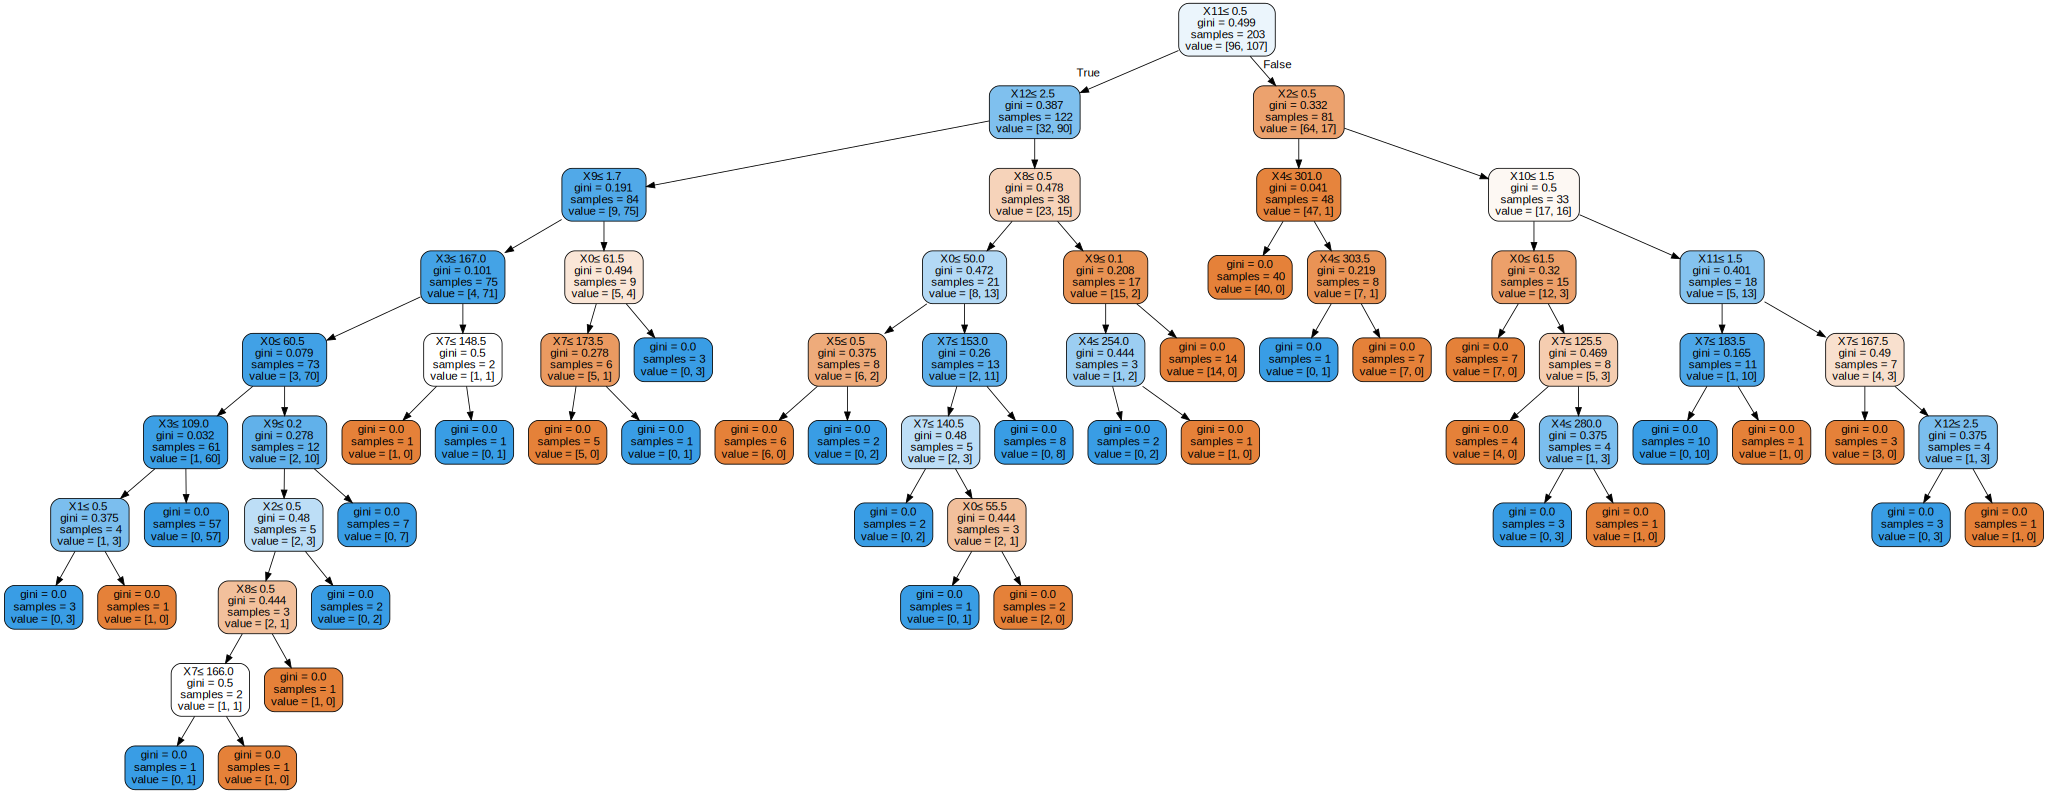

In [160]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Question** Faites une recherche du meilleur arbre de décision en jouant sur les hyperparamètres `max_depth` entre 2 et 10 et `criterion` qui peut être `"gini"` ou  `"entropy"`

In [161]:
test_entropy = []
test_gini=[]

In [162]:
max_depth=1
for i in range(10):
    clf=DecisionTreeClassifier(max_depth=i+1,criterion="entropy" ,random_state=0)
    clf=clf.fit(X_train,y_train)
    score = clf.score(X_test, y_test)
    test_entropy.append(score)

In [163]:
max_depth=1
for i in range(10):
    clf=DecisionTreeClassifier(max_depth=i+1,criterion="gini" ,random_state=0)
    clf=clf.fit(X_train,y_train)
    score= clf.score(X_test, y_test)
    test_gini.append(score)

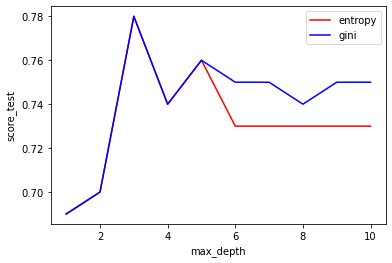

In [164]:
plt.plot(range(1,11),test_entropy,color='red',label='entropy')
plt.plot(range(1,11),test_gini,color='blue',label='gini')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score_test')
plt.show()

**Question** Afficher l'arbre correspondant au meilleur estimateur.

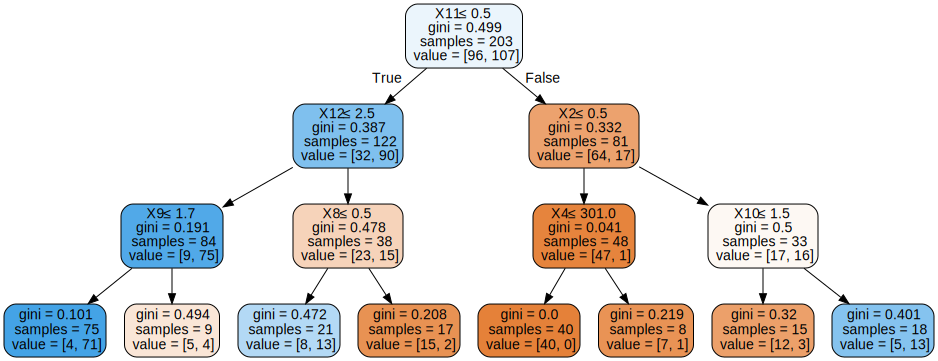

In [167]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Régression logistique 

## Observation

In [168]:
from ipywidgets import interact

def logistic_sigmoid(x, a, b):
    return 1 / (1 + np.exp(-(np.dot(a, x) + b))) 

def loss_logistic(x ,a, b):
    return np.log(np.exp(-(np.dot(a, x) + b))+1)

funcs = {"loss":loss_logistic, "sigmoïde": logistic_sigmoid}
grid_size = 0.1
x_grid = np.arange(-5, 5, grid_size)

plt.clf()

def plot_logistic_sigmoid(f, a, b):
    plt.plot(x_grid, funcs[f](x_grid, a, b), '-b')
    plt.axis([-5, 5, 0, 1])
    plt.show()


interact(
    plot_logistic_sigmoid,
    a=(-10, 10, .25),
    b=(-10, 10),
    f=['sigmoïde', 'loss']
)

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='f', options=('sigmoïde', 'loss'), value='sigmoïde'), FloatSlider(v…

<function __main__.plot_logistic_sigmoid(f, a, b)>

## Application

**Question** Importer `LogisticRegression` et entraîner un classifieur. Afficher le score. Adaptez le nombre d'itérations...

In [173]:
from sklearn.linear_model import LogisticRegression

In [209]:
log_reg = LogisticRegression(C=1e5)
log_reg.fit(X_train, y_train)

/home/zhou/anaconda3/envs/ds/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [210]:
log_reg.score(X_test,y_test)

0.8

**Question** Avec `LogisticRegressionCV` réglez les hyperparamètres. Quelle valeur de $C$ a été trouvée ? 

In [211]:
from sklearn.linear_model import LogisticRegressionCV

In [213]:
log_regCV = LogisticRegressionCV(Cs=100)

In [ ]:
log_regCV.fit(X_train,y_train)

## Scaling

Alors que ce n'est pas nécessaire pour les arbres de décision ou NaiveBayes, il pourrait être opportun de normaliser les attributs continus avec d'autres classifieurs...

**Question** Utiliser `StandardScaler` pour normaliser les attributs continus sur le train. Composer alors un nouveau jeu de données `X_train_scaled` avec les attributs continus normalisés et les attributs catégoriels inchangés. On utilisera `fit` pour entrainer la transformation puis `transform` pour l'appliquer au test ensuite... donnant `X_test_scaled`. 

In [191]:
from sklearn.preprocessing import StandardScaler

In [195]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [196]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

**Question** Réentraîner le classifieur par régression logistique avec ce nouveau jeu de données et estimer les scores.

In [198]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=100000.0)

In [201]:
prepro = logreg.predict_proba(X_test_scaled)
logreg.score(X_test_scaled,y_test)

0.81

# SVC...

**Question** Même si cela n'a pas été étudié en cours... on peut aussi utiliser le classifieur `SVC` (voir [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)) 

In [202]:
from sklearn.svm import SVC

In [204]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [207]:
svm.score(X_test,y_test)

0.72